Q.1: Import data and check null values, column info, and descriptive statistics of the data.

In [1]:
import pandas as pd

# Load the data
file_path = 'Instagram-Reach.csv'
data = pd.read_csv(file_path)

# Check for null values
null_values = data.isnull().sum()

# Display column information
column_info = data.info()

# Display descriptive statistics
descriptive_stats = data.describe()

null_values, column_info, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


(Date               0
 Instagram reach    0
 dtype: int64,
 None,
        Instagram reach
 count       365.000000
 mean      50474.712329
 std       30051.787552
 min        7620.000000
 25%       25070.000000
 50%       43987.000000
 75%       68331.000000
 max      161998.000000)

Q.2: Convert the Date column into datetime datatype

In [2]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

data.head()


,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


Q.3: Analyze the trend of Instagram reach over time using a line chart

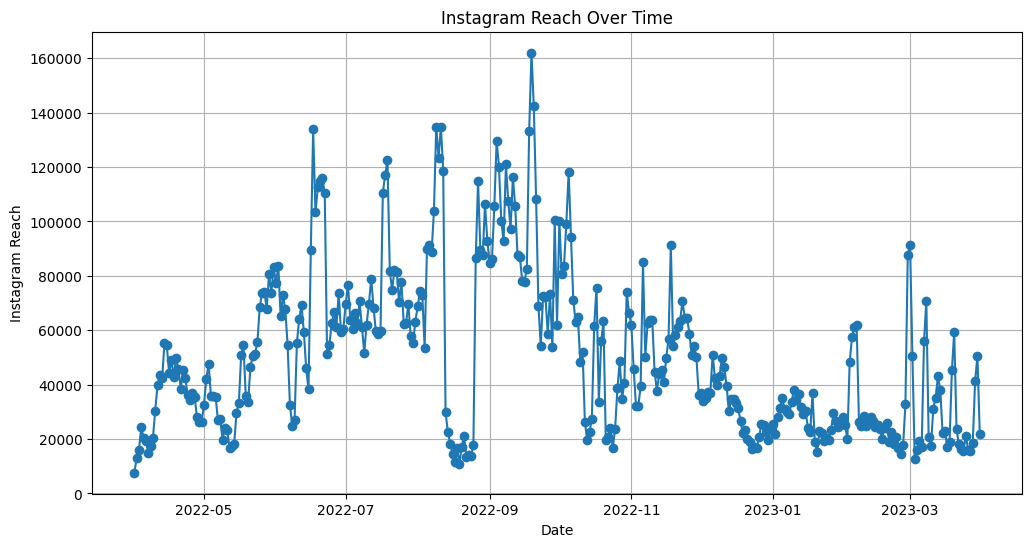

In [3]:
import matplotlib.pyplot as plt

# Analyze the trend of Instagram reach over time using a line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'], marker='o', linestyle='-')
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()


Q.4: Analyze Instagram reach for each day using a bar chart

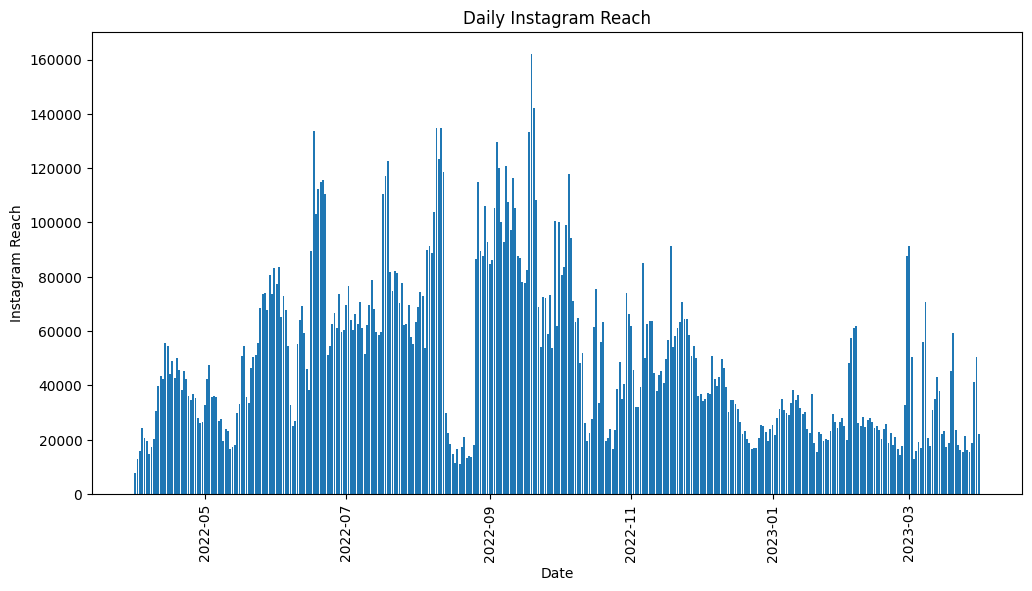

In [4]:
# Analyze Instagram reach for each day using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Instagram reach'])
plt.title('Daily Instagram Reach')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.xticks(rotation=90)
plt.show()


Q.5: Analyze the distribution of Instagram reach using a box plot

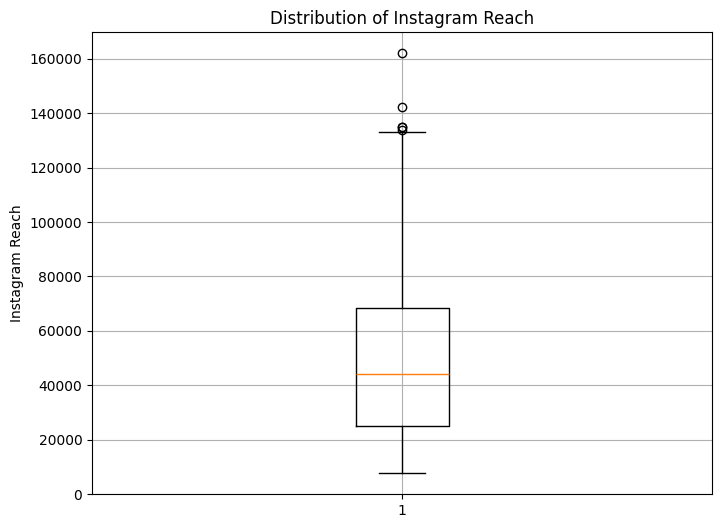

In [5]:
# Analyze the distribution of Instagram reach using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Instagram reach'])
plt.title('Distribution of Instagram Reach')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()


Q.6: Create a day column and analyze reach based on the days of the week

In [6]:
# Create a 'Day' column
data['Day'] = data['Date'].dt.day_name()

data.head()


,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


Q.7: Analyze the reach based on the days of the week

In [7]:
# Group by the 'Day' column and calculate mean, median, and standard deviation of reach
weekly_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_stats


,mean,median,std
Day,,,
Monday,52621.692308,46853.0,32296.071347
Tuesday,54030.557692,48786.0,32503.726482
Wednesday,51017.269231,42320.5,29047.869685
Thursday,48570.923077,39150.0,28623.220625
Friday,46666.849057,35574.0,29856.943036
Saturday,47374.750000,40012.0,27667.043634
Sunday,53114.173077,47797.0,30906.162384


Q.8: Create a bar chart to visualize the reach for each day of the week

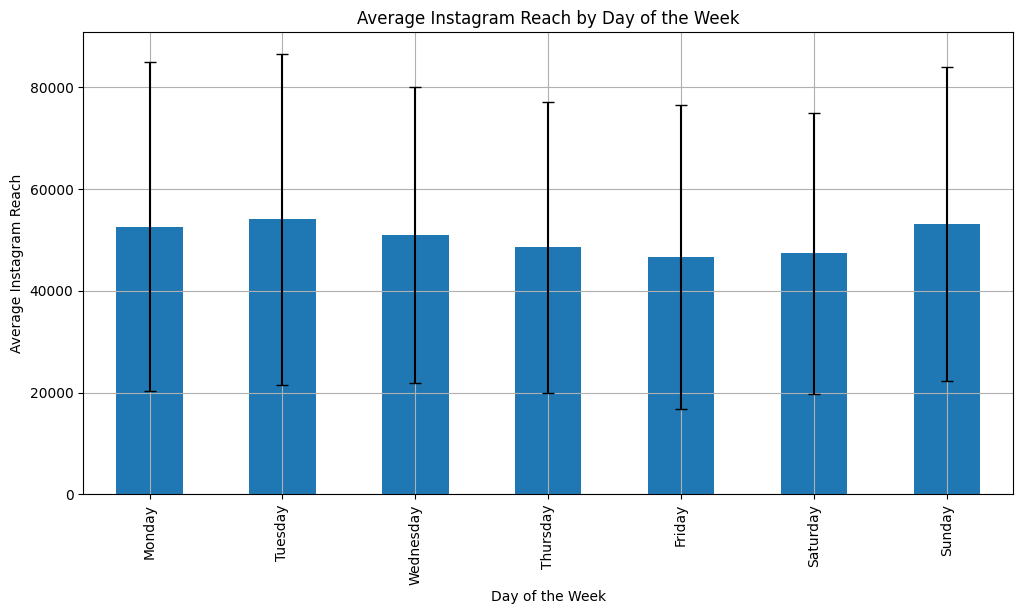

In [8]:
# Visualize the reach for each day of the week using a bar chart
plt.figure(figsize=(12, 6))
weekly_stats['mean'].plot(kind='bar', yerr=weekly_stats['std'], capsize=4)
plt.title('Average Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Instagram Reach')
plt.grid(True)
plt.show()


Q.9: Check the Trends and Seasonal patterns of Instagram reach

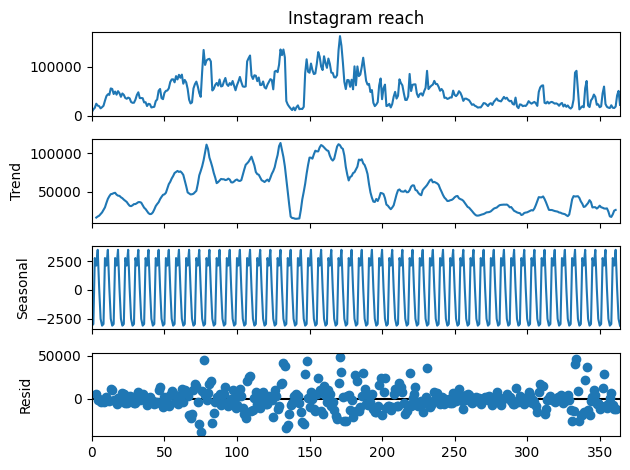

In [9]:
import statsmodels.api as sm

# Decompose the time series to check for trends and seasonal patterns
decomposition = sm.tsa.seasonal_decompose(data['Instagram reach'], model='additive', period=7)
fig = decomposition.plot()
plt.show()


Q.10: Find p, d, and q values using ACF and PACF plots

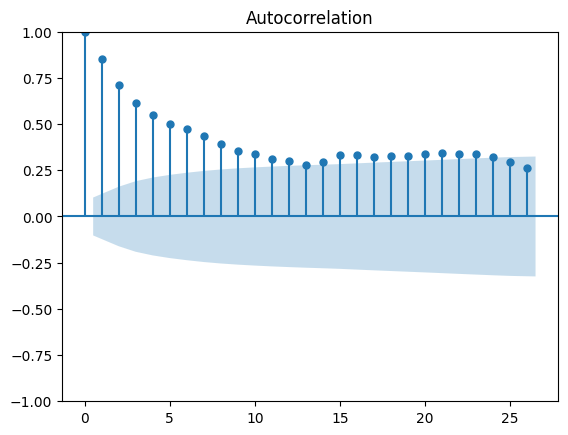

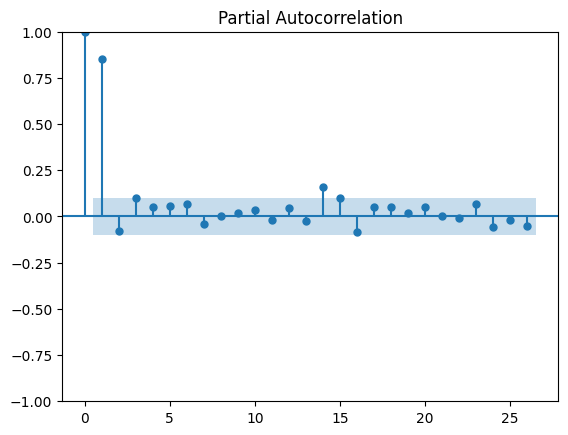

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation function (ACF) to determine p
plot_acf(data['Instagram reach'])
plt.show()

# Plot partial autocorrelation function (PACF) to determine q
plot_pacf(data['Instagram reach'])
plt.show()


Q.11: Train a model using SARIMA and make predictions

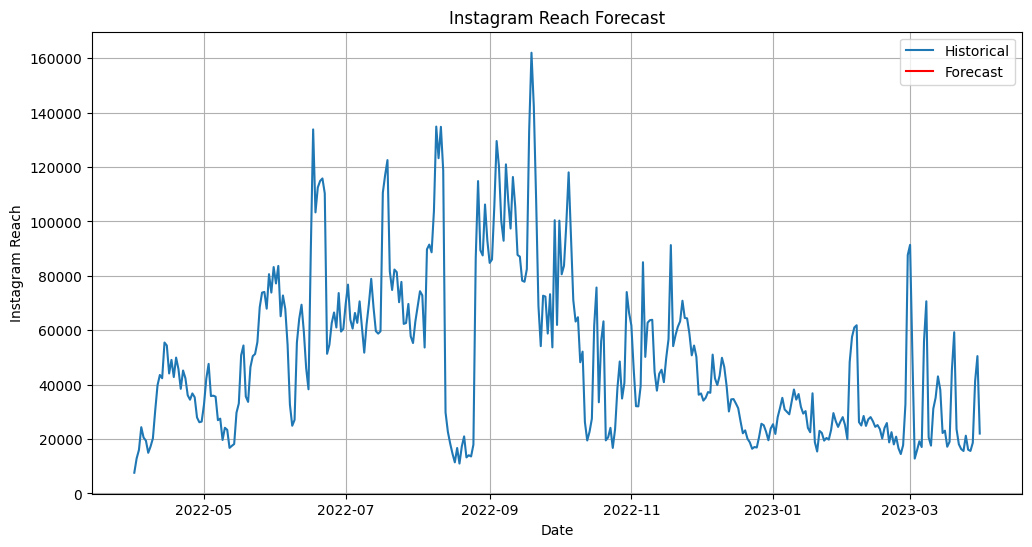

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with selected parameters (p, d, q)
model = SARIMAX(data['Instagram reach'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = model.fit(disp=False)

# Forecast the next 30 days
forecast = sarima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=data['Date'].iloc[-1], periods=30, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'], label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Instagram Reach Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.show()
